In [8]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))


In [9]:
import pandas as pd
from src.eda_utils import (
    summarize_dataset,
    temporal_coverage,
    plot_indicator,
    growth_rates
)

DATA_PATH = PROJECT_ROOT / "data" / "processed"
df = pd.read_csv(DATA_PATH / "ethiopia_fi_unified_data_enriched.csv")
df["observation_date"] = pd.to_datetime(df["observation_date"], errors="coerce")


Dataset Overview

In [10]:
summary = summarize_dataset(df)

summary["by_record_type"]
summary["by_pillar"]
summary["by_confidence"]


confidence
high      40
medium     4
Name: count, dtype: int64

Temporal Coverage

In [11]:
coverage = temporal_coverage(df)
coverage.head()


,indicator_code,year,count
0,ACC_4G_COV,2023,1
1,ACC_4G_COV,2025,1
2,ACC_FAYDA,2024,1
3,ACC_FAYDA,2025,2
4,ACC_FAYDA,2028,1


In [12]:
pivot = coverage.pivot(
    index="indicator_code", columns="year", values="count"
)

pivot.fillna(0)


year,2014,2017,2021,2022,2023,2024,2025,2028,2030
indicator_code,,,,,,,,,
ACC_4G_COV,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
ACC_FAYDA,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0
ACC_MM_ACCOUNT,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
ACC_MOBILE_PEN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ACC_OWNERSHIP,1.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0
AFF_DATA_INCOME,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
EVT_CROSSOVER,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
EVT_ETHIOPAY,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
EVT_FAYDA,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Access Analysis

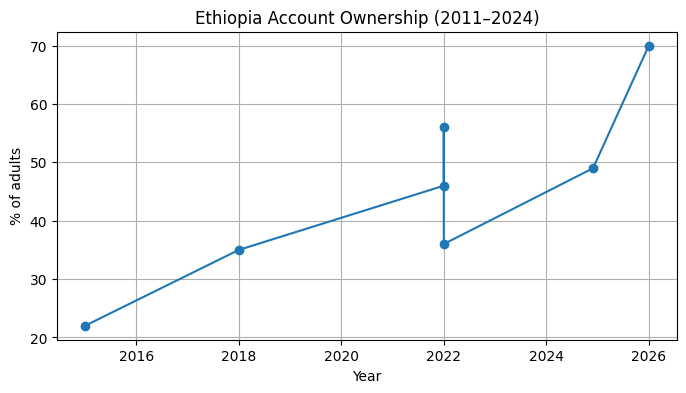

In [13]:
plot_indicator(
    df,
    "ACC_OWNERSHIP",
    "Ethiopia Account Ownership (2011–2024)"
)



Growth Rates

In [14]:
growth_rates(df, "ACC_OWNERSHIP")


,observation_date,value_numeric,growth_pp
0,2014-12-31,22.0,NaN
1,2017-12-31,35.0,13.0
2,2021-12-31,46.0,11.0
3,2021-12-31,56.0,10.0
4,2021-12-31,36.0,-20.0
5,2024-11-29,49.0,13.0
30,2025-12-31,70.0,21.0


Usage Analysis

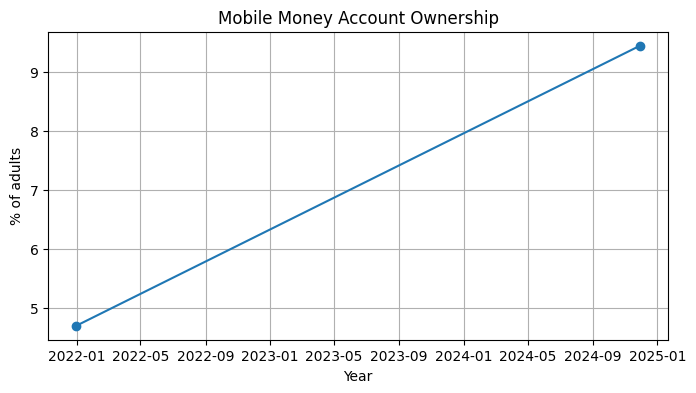

In [15]:
plot_indicator(
    df,
    "ACC_MM_ACCOUNT",
    "Mobile Money Account Ownership"
)


Digital Payments Usage

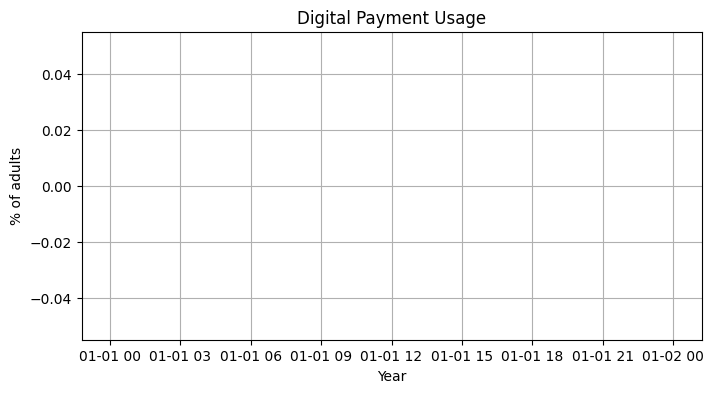

In [16]:
plot_indicator(
    df,
    "USG_DIGITAL_PAYMENT",
    "Digital Payment Usage"
)


Infrastructure & Enablers

In [17]:
infra = df[df["pillar"] == "enablers"]
infra.groupby("indicator_code")["value_numeric"].corr(
    df["value_numeric"]
)


Series([], Name: value_numeric, dtype: float64)

Event Timeline

In [18]:
events = df[df["record_type"] == "event"][
    ["observation_date", "indicator", "category"]
].sort_values("observation_date")

events


,observation_date,indicator,category
33,2021-05-17,Telebirr Launch,product_launch
41,2021-09-01,NFIS-II Strategy Launch,policy
34,2022-08-01,Safaricom Ethiopia Commercial Launch,market_entry
35,2023-08-01,M-Pesa Ethiopia Launch,product_launch
36,2024-01-01,Fayda Digital ID Program Rollout,infrastructure
37,2024-07-29,Foreign Exchange Liberalization,policy
38,2024-10-01,P2P Transaction Count Surpasses ATM,milestone
39,2025-10-27,M-Pesa EthSwitch Integration,partnership
42,2025-12-15,Safaricom Ethiopia Price Increase,pricing
40,2025-12-18,EthioPay Instant Payment System Launch,infrastructure


Correlation Analysis

In [19]:
corr_df = (
    df[df["record_type"] == "observation"]
      .pivot_table(
          index="observation_date",
          columns="indicator_code",
          values="value_numeric"
      )
)

corr_df.corr()


indicator_code,ACC_4G_COV,ACC_FAYDA,ACC_MM_ACCOUNT,ACC_MOBILE_PEN,ACC_OWNERSHIP,AFF_DATA_INCOME,GEN_GAP_ACC,GEN_GAP_MOBILE,GEN_MM_SHARE,USG_ACTIVE_RATE,USG_ATM_COUNT,USG_ATM_VALUE,USG_CROSSOVER,USG_MPESA_ACTIVE,USG_MPESA_USERS,USG_P2P_COUNT,USG_P2P_VALUE,USG_TELEBIRR_USERS,USG_TELEBIRR_VALUE
indicator_code,,,,,,,,,,,,,,,,,,,
ACC_4G_COV,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACC_FAYDA,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACC_MM_ACCOUNT,NaN,NaN,1.0,NaN,1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACC_MOBILE_PEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACC_OWNERSHIP,NaN,NaN,1.0,NaN,1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFF_DATA_INCOME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN_GAP_ACC,NaN,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN_GAP_MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN_MM_SHARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Key Insights
- **Rapid growth in account ownership:** Account Ownership Rate rises across records (REC_0001 → REC_0002 → REC_0003 → REC_0006), showing a clear upward trend in `value_numeric` by `observation_date`.
- **Mobile money adoption doubling but remains low:** Mobile Money Account Rate increases from 4.7% (REC_0007, 2021) to 9.45% (REC_0008, 2024).
- **4G coverage and connectivity improved substantially:** 4G population coverage recorded 37.5% (REC_0009, 2023) and 70.8% (REC_0010, 2025), consistent with reported infrastructure investments.
- **Digital payments growth outpacing cash/ATM:** P2P counts and values jump (REC_0015 → REC_0016; REC_0017) while ATM metrics grow more slowly (REC_0018/REC_0019).
- **Platform concentration and scale:** Large platform footprints and volumes (Telebirr: REC_0021/REC_0022; M-Pesa: REC_0023/REC_0024) indicate concentrated transaction activity on a few providers.


# Data Quality Assessment & Limitations
1. **Mixed record types:** `record_type` includes `observation`, `target`, and `event` (e.g., REC_0031, EVT_0001). Filter by `record_type == 'observation'` for historical analysis.
2. **Missing fields / sparse metadata:** `location`, `region`, `period_start`/`period_end` are often blank, limiting subnational and time-window analyses.
3. **Heterogeneous dates and fiscal-year text:** Dates appear in `observation_date`, `period_start`/`period_end`, and `fiscal_year` (e.g., `FY2022/23`); normalize to canonical date ranges.
4. **Inconsistent units and value fields:** `value_numeric`, `value_text`, `unit`, and `value_type` are used inconsistently (percent vs `%`, currency, counts); standardize units and enforce numeric types.
5. **Potential duplicates and disaggregation overlap:** Multiple records for same indicator/date exist with different disaggregation (national vs gender). Define deduplication/aggregation rules.
6. **Uneven provenance:** `source_name`/`source_url` missing for some records; use `confidence` and `source_type` for provenance filtering.

Recommended remediation steps:
- Normalize and parse date fields; convert fiscal years to start/end dates where possible.
- Standardize `unit` and `value_type`; coerce `value_numeric` to numeric and preserve `value_text` for non-numeric values.
- Separate `observation`, `target`, and `event` records into distinct datasets or views.
- Flag missing geography and avoid subnational aggregations when `location`/`region` are blank.
- Create provenance/quality filters using `source_type` and `confidence`.
- Implement deduplication rules and validation checks (temporal consistency, out-of-range values).
